<a href="https://colab.research.google.com/github/0kinosawa0/Main_GroupProject_EGBI222/blob/main/EGBI222_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Set up the program to use**

In [ ]:
!pip install kaggle
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# 1. Remove the file (force delete, even if it's not a folder)
!rm -rf /root/.kaggle

# 2. Recreate as a directory
!mkdir -p /root/.kaggle

# 3. Copy kaggle.json from Drive
!cp /content/drive/MyDrive/kaggle/kaggle.json /root/.kaggle/

# 4. Fix permissions
!chmod 600 /root/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!pip install yt-dlp
!pip install -q git+https://github.com/openai/whisper.git
!apt-get install -y ffmpeg
!pip uninstall torch torchvision torchaudio -y
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install faster-whisper

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Found existing installation: torch 2.7.1+cu118
Uninstalling torch-2.7.1+cu118:
  Successfully uninstalled torch-2.7.1+cu118
Found existing installation: torchvision 0.22.1+cu118
Uninstalling torchvision-0.22.1+cu118:
  Successfully uninstalled torchvision-0.22.1+cu118
Found existing installation: torchaudio 2.7.1+cu118
Uninstalling torchaudio-2.7.1+cu118:
  Successfully uninstalled torchaudio-2.7.1+cu118
Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.7.1%2Bcu118-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (28 kB)
  Using cached https://download.pytorch.org

In [ ]:
!pip install -q -U google-generativeai
!pip install -q langdetect
# Import the Python SDK
import google.generativeai as genai
# Used to securely store your API key
#from google.colab import userdata
import os
#GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)
model_gemini = genai.GenerativeModel('gemini-2.5-flash')
!pip install deep-translator

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yt_dlp
import shutil
import time, random, pandas as pd, yt_dlp
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm.notebook import tqdm
import torch
from faster_whisper import WhisperModel
import whisper
import torch
from whisper.utils import get_writer
from langdetect import detect
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [ ]:
!kaggle datasets list
!kaggle datasets download cyberevil545/youtube-videos-data-for-ml-and-trend-analysis
!unzip /content/youtube-videos-data-for-ml-and-trend-analysis.zip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build

**Import file + clean file**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EGBI222_Group Project_1/youtube_data.csv')
df.sort_values(by="duration", ascending=False)
df = df[(df['duration'] > 60) & (df['duration'] < 600)]
df

,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.00,25.00,h264,News & Politics,https://www.youtube.com/watch?v=--F7dc-_FSI,«السودان ينتفض» أمام السفارة بالقاهرة,حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3
2,--g2gG8pQ0w,233,3028,2833,1280,720,23.98,23.98,h264,Comedy,https://www.youtube.com/watch?v=--g2gG8pQ0w,New Hip Hop - Kemo Treats - Pancakes,Download all our music for FREE just enter $0....,"breaking bad spoof, Recipes, Pancakes, canada,...",13227,135,17
3,-0DR7-voRCU,562,431,300,320,240,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0DR7-voRCU,Sister's Keeper Impression,A Review of the Shampoo Bar(Sunburst) and Dip ...,"natural hair, first impression, sister's keepe...",43,1,0
4,-0Fkp-2EzX0,300,3087,2929,1280,720,23.98,23.98,h264,Gaming,https://www.youtube.com/watch?v=-0Fkp-2EzX0,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,JBHAMMER777 is he strong enough to fight again...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0
5,-0J-a-kKR1M,135,467,371,320,240,30.00,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0J-a-kKR1M,D'Salapa mirae,,"mirae, D'Salapa",168,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17584,zyK7-WQTDaY,571,1285,1175,640,480,29.92,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zyK7-WQTDaY,rentero 1ª parte 2.MOD,,"rentero, latapialinares, iu, pca",27,0,0
17585,zyPO-hxvWDg,105,840,719,640,480,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zyPO-hxvWDg,Cascavel faz campanha impecável em campeonato ...,,NaN,295,1,0
17586,zyYk-W_JqNY,161,920,820,640,480,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zyYk-W_JqNY,Marcha para Cristo.San Francisco Menéndez. 5 ...,NaN,"Cristo, Marcha, para",770,3,0
17587,zz3a-wnxBrs,291,4892,4738,1920,1080,29.97,29.97,h264,Gaming,https://www.youtube.com/watch?v=zz3a-wnxBrs,DK Solo Steinerne Kern,"Das ist mein erstes Video, also ist noch alles...","Steinerne Kern, Vitriolsteindrachen, DK Solo, ...",42,1,0


**Programs for each machine**


P=0, Raphael=1,2 ,chen=3,ice=4

In [ ]:
#(หน้าที่) ฟาต้องเขียนเเยกข้อมูลให้เพื่อนเเต่ละคน
#ฟาในอดีตคิดว่าจะใช้Modulo แยกเเบบหารได้เท่าไหร่คนนั้นทำอันนั้นจากIndex
CSV_PATH      = "/content/drive/MyDrive/EGBI222_Group Project_1/youtube_data.csv"   # ไฟล์ข้อมูล
OUTPUT_DIR    = "/content/drive/MyDrive/EGBI222_Group Project_1/audio"  # โฟลเดอร์เก็บ .mp3
RESULTS_DIR   = "/content/drive/MyDrive/EGBI222_Group Project_1/results"  # โฟลเดอร์เก็บ CSV ผลลัพธ์

TOTAL_MACHINES = 5     # จำนวนเครื่อง(ที่ใช้รัน)
MACHINE_ID     = 1    # ลำดับเครื่อง(ใส่ค่าด้านบน).                                           #<-------------------------------------------เปลี่ยนตรงนี้

# ตั้งชื่อไฟล์ผลลัพธ์ของเครื่องนี้
SUFFIX = f"part_name"                                     #<-------------------------------------------เปลี่ยน name เป็นชื่อตัวเองตรงนี้
OUT_CSV = os.path.join(RESULTS_DIR, f"processed_{SUFFIX}.csv")

MAX_WORKERS_DL = 3
SLEEP_RANGE    = (0.5, 1.5)
COOKIE_PATH = None          #ถ้าฟาหาคุกกี้เจอเอามาเปลี่ยนตรงนี้

os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(RESULTS_DIR, exist_ok=True)

if "url" not in df.columns:
    raise ValueError( "ไม่พบคอลัมน์ 'url' ใน CSV")

# ใส่คอลัมน์ไปก่อน
for col in ["audio_path", "Transcript", "Translate"]:
    if col not in df.columns:
        df[col] = None

#แบ่งจาก index
work_df = df[df.index % TOTAL_MACHINES == MACHINE_ID].copy().reset_index(drop=True)

display(work_df)
print(f"เครื่องนี้จะประมวลผลทั้งหมด: {len(work_df)} แถว") #ต้องได้ประมาณ2200-2300

,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments,audio_path,Transcript,Translate
0,-1mDE-k-hc8,231,758,563,1280,720,30.00,30.00,h264,Education,https://www.youtube.com/watch?v=-1mDE-k-hc8,Problem 1 - Statics,Problem 1 - Statics,Problem 1 - Statics,93,0,0,None,None,None
1,-2lLo-OjUqo,198,555,428,640,480,25.00,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-2lLo-OjUqo,10 Bets When You Will Always Win.!!!,NaN,"Always, Easy, win, bet, You",22,0,0,None,None,None
2,-45a6-fNYSc,414,767,645,640,480,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-45a6-fNYSc,Chopin Nocturne Op 27 # 2 D Flat Major,2003,"Chopin, Nocturne",41,0,0,None,None,None
3,-4Rpb-aL6EM,70,1085,1081,1280,720,29.97,29.97,h264,Education,https://www.youtube.com/watch?v=-4Rpb-aL6EM,gracioso,mascota,perrito gracioso,18,2,0,None,None,None
4,-520F-iDQsU,587,543,416,640,356,25.00,0.00,h264,News & Politics,https://www.youtube.com/watch?v=-520F-iDQsU,Morire per l'euro?,Servizio di Francesco Pungitore sulla crisi ch...,"Business, Bce, Grecia, Bruno Amoroso, Euro in ...",147,2,1,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,ztn-LVvmk2k,390,793,671,480,360,29.97,0.00,h264,Gaming,https://www.youtube.com/watch?v=ztn-LVvmk2k,Crysis 2 Crazy Hack,"Hack без применения читов, путём поправления в...","crazy, warfare, fps, gameplay, guns, computer ...",2184,0,4,None,None,None
2210,zunI-G0754w,152,2639,2493,1280,720,30.00,30.00,h264,Comedy,https://www.youtube.com/watch?v=zunI-G0754w,Rocking out with Grandpa to Uncle Sean's music...,Rocking out with Grandpa to Uncle Sean's music...,"Out, Electric, Cute, Toddler, Rocking, Rock, G...",112,2,1,None,None,None
2211,zwBx-fkQ_Kc,87,702,609,640,480,25.00,0.00,h264,News & Politics,https://www.youtube.com/watch?v=zwBx-fkQ_Kc,Bulletin Previmeteo.TV pour le Sud-Est,Bulletin météo pour le Sud-Est pour le mardi 2...,"SudEst, france, météo",0,0,0,None,None,None
2212,zxdh-kqHEt4,226,3046,2964,1280,720,23.98,23.98,h264,Music,https://www.youtube.com/watch?v=zxdh-kqHEt4,Man Man - Van Helsing Boombox @ Southgate House,Man Man performs at the Southgate House in New...,"Van Helsing Boombox, Man Man, Southgate House",49,0,0,None,None,None


เครื่องนี้จะประมวลผลทั้งหมด: 2214 แถว


***Download(Video)***

In [ ]:
#โค๊ดของใหม่ ก็อปมา ฟาในอดีตไม่ได้สร้างเองน้า
#ปัญหา ฟาในอดีตคิดว่ามันมันเรียกdef ทีละรอบมันโหลดทีละอันมันน่าจะช้าเกินไปนะ
#(หน้าที่) ฟาต้องเขียนอันที่ไหนกว่านี้อีกเซลล์ชื่อ(Quick Download)
#ฟาในอดีตคิดว่าdefของใหม่ดีเเล้ว เเต่ไปเปลี่ยนตอนเรียกคำสั่งให้มันโหลดหลายๆอันพร้อมกันจะได้ไวๆ อยากให้เพิ่มskipอันที่โหลดไปเเล้ว(ถ้าตัวโหลดหลายอันมันเผลอโหลดอันเดียวกันจะได้skip)
def download_audio_files(youtube_url, video_id):
    output_dir = "/content/drive/MyDrive/EGBI222_Group Project_1/audio"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    audio_file_path = os.path.join(output_dir, f'{video_id}.mp3')

    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': audio_file_path.replace('.mp3', ''),
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'mp3',
        }],
        'quiet': True,
        'no_warnings': True,
    }

    print(f"🎧 Attempting to download: {youtube_url}")
    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            ydl.download([youtube_url])
        print(f"✅ Successfully downloaded: {audio_file_path}")
        return audio_file_path
    except yt_dlp.utils.DownloadError as e:
        print(f"⚠️ ERROR downloading {youtube_url} (ID: {video_id}). Skipping file.")
        return None
    finally:
        time.sleep(2)

In [ ]:
df_test = work_df.iloc[:5]#<------------------- เปลี่ยนตรงนี้

work_df["audio_path"] = df_test.apply(
    lambda row: download_audio_files(row['url'], row['video_id']),
    axis=1
  )

🎧 Attempting to download: https://www.youtube.com/watch?v=-1mDE-k-hc8
✅ Successfully downloaded: /content/drive/MyDrive/EGBI222_Group Project_1/audio/-1mDE-k-hc8.mp3
🎧 Attempting to download: https://www.youtube.com/watch?v=-2lLo-OjUqo
✅ Successfully downloaded: /content/drive/MyDrive/EGBI222_Group Project_1/audio/-2lLo-OjUqo.mp3
🎧 Attempting to download: https://www.youtube.com/watch?v=-45a6-fNYSc
✅ Successfully downloaded: /content/drive/MyDrive/EGBI222_Group Project_1/audio/-45a6-fNYSc.mp3
🎧 Attempting to download: https://www.youtube.com/watch?v=-4Rpb-aL6EM
✅ Successfully downloaded: /content/drive/MyDrive/EGBI222_Group Project_1/audio/-4Rpb-aL6EM.mp3
🎧 Attempting to download: https://www.youtube.com/watch?v=-520F-iDQsU
✅ Successfully downloaded: /content/drive/MyDrive/EGBI222_Group Project_1/audio/-520F-iDQsU.mp3


 **Quick Download**

In [ ]:
from concurrent.futures import ThreadPoolExecutor, as_completed
import yt_dlp, time, os
def download_audio_files(youtube_url, video_id):
    output_dir = "/content/drive/MyDrive/EGBI222_Group Project_1/audio"
    os.makedirs(output_dir, exist_ok=True)

    audio_file_path = os.path.join(output_dir, f"{video_id}.mp3")

    if os.path.exists(audio_file_path):
        print(f"⏩ Skip {video_id} (already exists)")
        return audio_file_path

    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': audio_file_path.replace('.mp3', ''),
        'postprocessors': [{'key': 'FFmpegExtractAudio', 'preferredcodec': 'mp3'}],
        'quiet': True,
        'no_warnings': True,
    }

    try:
      #ฟาอย่าลืมใส่อีโมจิมีสีด้วยน้าจะได้เห็นง่ายๆ( ˘ ³˘)♥
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            ydl.download([youtube_url])
        print(f"✅ Done: {video_id}")
        return audio_file_path
    except Exception as e:
        print(f"⚠️ Error downloading {video_id}: {e}")
        return None
    finally:
        time.sleep(1) #เอาชัวโหลดหลายอันให้น้องพักบ้าง

In [ ]:
#(หน้าที่)ฟาต้องเขียนเขียนโหลดเเบบขนานจะได้ไวขึ้น
#ปัญหา รันรัวๆไม่ได้youtubeจะหาว่าเป็นบอท(time.sleepก็ไม่ได้นะลองเเย้ว) #โดนจับประมาณตอน315-350
df_test = work_df.iloc[:300]  # ← เปลี่ยนตรงนี้ #คิดไม่ออกเเย้วโหลดมือทีละ300ไปละกันนะ  ┑(￣▽￣)┍
max_workers = 5 #5กับ10 ดีสุดจากฟาในอดีต ลองรันมาละ

futures = []
paths = [None] * len(df_test)

with ThreadPoolExecutor(max_workers=max_workers) as executor:
    for i, row in enumerate(df_test.itertuples(index=False)):
        futures.append(executor.submit(download_audio_files, row.url, row.video_id))

    for i, fut in enumerate(as_completed(futures)):
        paths[i] = fut.result()

# เขียนผลกลับเข้า work_df (เฉพาะช่วงที่โหลด)
work_df.loc[df_test.index, "audio_path"] = paths
print("ดาวน์โหลดเสร็จแล้ว🙃")

[download]  40.5% of    5.32MiB at  264.75KiB/s ETA 00:12✅ Done: 1BG7-jb162I
[download]   9.7% of ~  12.76MiB at    1.81KiB/s ETA 01:22:34 (frag 6/72)✅ Done: 1JzA-unhnN8
[download]  10.0% of ~  13.10MiB at   18.62KiB/s ETA 58:24 (frag 6/72)   ⏩ Skip 1N3a-x4JSS0 (already exists)
[download]   8.4% of ~  17.47MiB at   55.49KiB/s ETA 43:28 (frag 7/72)✅ Done: 1IJP-2tuqHg
[download]  12.5% of ~  13.43MiB at      0.00B/s ETA Unknown (frag 8/72)
[download]  14.2% of ~  14.40MiB at   32.62KiB/s ETA 12:51 (frag 9/72)✅ Done: 1JDM-T1sR_U
[download]  12.6% of ~  17.01MiB at   45.99KiB/s ETA 10:36 (frag 10/72)⏩ Skip 1Ubc-m0HX2o (already exists)
✅ Done: 153W-injxtw
[download]  15.3% of ~  15.64MiB at   57.69KiB/s ETA 32:28 (frag 10/72)
[download]  13.8% of ~  17.38MiB at   60.61KiB/s ETA 29:36 (frag 11/72)✅ Done: 1BZT-d2uo2E
✅ Done: 13Fp-oG4bhQ
[download]  22.6% of ~  14.78MiB at   38.46KiB/s ETA 14:40 (frag 17/72)
[download]  25.0% of ~  14.75MiB at   52.88KiB/s ETA 21:28 (frag 19/72)✅ Done: NXBw-e-

**##########################################################**

**Remove unloaded files**

In [ ]:
#(หน้าที่)ฟาต้องเช็คpath(ลงในcolumn["audio_path"]) ละอันไหนหาไม่เจอเเสดงว่าโหลดไม่ได้ จะได้ลบทิ้ง
def check_audio_path(video_id):

    audio_file_path = os.path.join(OUTPUT_DIR, f"{video_id}.mp3")
    if os.path.exists(audio_file_path):
        return audio_file_path
    else:
        return None


work_df["audio_path"] = work_df["video_id"].apply(check_audio_path)

In [ ]:
work_df.dropna(subset=['audio_path'], inplace=True)
display(work_df)
print(f"เหลือที่ต้องประมวลผลทั้งหมด: {len(work_df)} แถว")


,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments,audio_path,Transcript,Translate
0,-1mDE-k-hc8,231,758,563,1280,720,30.00,30.00,h264,Education,https://www.youtube.com/watch?v=-1mDE-k-hc8,Problem 1 - Statics,Problem 1 - Statics,Problem 1 - Statics,93,0,0,/content/drive/MyDrive/EGBI222_Group Project_1...,None,None
1,-2lLo-OjUqo,198,555,428,640,480,25.00,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-2lLo-OjUqo,10 Bets When You Will Always Win.!!!,NaN,"Always, Easy, win, bet, You",22,0,0,/content/drive/MyDrive/EGBI222_Group Project_1...,None,None
2,-45a6-fNYSc,414,767,645,640,480,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-45a6-fNYSc,Chopin Nocturne Op 27 # 2 D Flat Major,2003,"Chopin, Nocturne",41,0,0,/content/drive/MyDrive/EGBI222_Group Project_1...,None,None
3,-4Rpb-aL6EM,70,1085,1081,1280,720,29.97,29.97,h264,Education,https://www.youtube.com/watch?v=-4Rpb-aL6EM,gracioso,mascota,perrito gracioso,18,2,0,/content/drive/MyDrive/EGBI222_Group Project_1...,None,None
4,-520F-iDQsU,587,543,416,640,356,25.00,0.00,h264,News & Politics,https://www.youtube.com/watch?v=-520F-iDQsU,Morire per l'euro?,Servizio di Francesco Pungitore sulla crisi ch...,"Business, Bce, Grecia, Bruno Amoroso, Euro in ...",147,2,1,/content/drive/MyDrive/EGBI222_Group Project_1...,None,None
6,-6Xlv-mwca4,599,906,820,640,480,25.00,0.00,h264,Education,https://www.youtube.com/watch?v=-6Xlv-mwca4,نابغه الطرفايه اسلام عبد الرحمن 1.wmv,اسلام عبد الرحمن محمد عبد الهادي طفل في الحادي...,"عبد, نابغه, الطرفايه, الرحمن, اسلام",2200,7,0,/content/drive/MyDrive/EGBI222_Group Project_1...,None,None
9,-AeSq6xSEtM,90,402,301,352,288,14.16,14.16,h264,Entertainment,https://www.youtube.com/watch?v=-AeSq6xSEtM,Xbox 360 destruction,"I didn't like my Xbox 360 anymore, and i wante...","destruction, video, xbox360, game",8598,34,18,/content/drive/MyDrive/EGBI222_Group Project_1...,None,None
10,-Ca7e-PQ16I,121,889,784,480,360,29.97,0.00,h264,Comedy,https://www.youtube.com/watch?v=-Ca7e-PQ16I,cdr!de Silver bullet,Silver bullet at Knotts Berry Farm,knotts berry farm,59,1,0,/content/drive/MyDrive/EGBI222_Group Project_1...,None,None


เหลือที่ต้องประมวลผลทั้งหมด: 8 แถว


**#######################ห้ามกดเซลล์นี้ถ้าราฟาเอลไม่ได้สั่ง ##########################**

In [ ]:
#ถ้าทำถึงขั้นนี้ทักไลน์ราฟาเอลหรือโทร0982560366 (ช่องทางอื่นอาจตอบช้า)
#(หน้าที่)เซฟไฟล์ครั้งเเรกลงdrive(จะได้ไม่หาย)*ฟาในอนาคตต้องทำอย่าคิดว่าไม่ทำก็ได้ จากฟาในอดีต
import pandas as pd, os
RESULTS_DIR = "/content/drive/MyDrive/EGBI222_Group Project_1/results"
os.makedirs(RESULTS_DIR, exist_ok=True)
OUT_CSV = os.path.join(RESULTS_DIR, "progress_name.csv") #<-------------------------------------------เปลี่ยน name เป็นชื่อตัวเองตรงนี้

work_df.to_csv(OUT_CSV, index=False, encoding="utf-8")
print(f"✅ สร้างไฟล์เริ่มต้นแล้ว -> {OUT_CSV} ({len(df)} แถว)")

✅ สร้างไฟล์เริ่มต้นแล้ว -> /content/drive/MyDrive/EGBI222_Group Project_1/results/progress_name.csv (11186 แถว)


**####################################################################**

**Load Save**

In [ ]:
#Run time out
#(หน้าที่)ฟาต้องเรียกprogress_name.csv จากdrive จะโหลดเซฟมารันต่อในกรณี มันหลุดไฟล์จะได้ไม่หาย(คอมเพื่อนจะพังตอนไหนไม่รู้เซฟไว้ก่อนดีสุด👍)
import pandas as pd, os

RESULTS_DIR = "/content/drive/MyDrive/EGBI222_Group Project_1/results"
OUT_CSV = os.path.join(RESULTS_DIR, "progress_name.csv")#<-------------------------------------------เปลี่ยน name เป็นชื่อตัวเองตรงนี้

if os.path.exists(OUT_CSV):
    work_df = pd.read_csv(OUT_CSV)
    print(f"โหลดไฟล์เดิม -> {OUT_CSV} ({len(work_df)} แถว)")
#เช็คpathเอาชัว รันในเซล์นี้เพื่อนจะได้กดเเค่อันเดียว(กลัวพอให้เพื่อนกลับไปกดอันบนละจะกดผิด🙃)
def check_audio_path(video_id):
    Merged = "/content/drive/MyDrive/EGBI222_Group Project_1/audio"
    audio_file_path = os.path.join(Merged, f"{video_id}.mp3")
    if os.path.exists(audio_file_path):
        return audio_file_path
    else:
        return None
work_df["audio_path"] = work_df["video_id"].apply(check_audio_path)
work_df.dropna(subset=['audio_path'], inplace=True)
display(work_df)

โหลดไฟล์เดิม -> /content/drive/MyDrive/EGBI222_Group Project_1/results/progress_name.csv (8 แถว)


,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments,audio_path,Transcript,Translate
0,-1mDE-k-hc8,231,758,563,1280,720,30.00,30.00,h264,Education,https://www.youtube.com/watch?v=-1mDE-k-hc8,Problem 1 - Statics,Problem 1 - Statics,Problem 1 - Statics,93,0,0,/content/drive/MyDrive/EGBI222_Group Project_1...,NaN,NaN
1,-2lLo-OjUqo,198,555,428,640,480,25.00,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-2lLo-OjUqo,10 Bets When You Will Always Win.!!!,NaN,"Always, Easy, win, bet, You",22,0,0,/content/drive/MyDrive/EGBI222_Group Project_1...,NaN,NaN
2,-45a6-fNYSc,414,767,645,640,480,29.97,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-45a6-fNYSc,Chopin Nocturne Op 27 # 2 D Flat Major,2003,"Chopin, Nocturne",41,0,0,/content/drive/MyDrive/EGBI222_Group Project_1...,NaN,NaN
3,-4Rpb-aL6EM,70,1085,1081,1280,720,29.97,29.97,h264,Education,https://www.youtube.com/watch?v=-4Rpb-aL6EM,gracioso,mascota,perrito gracioso,18,2,0,/content/drive/MyDrive/EGBI222_Group Project_1...,NaN,NaN
4,-520F-iDQsU,587,543,416,640,356,25.00,0.00,h264,News & Politics,https://www.youtube.com/watch?v=-520F-iDQsU,Morire per l'euro?,Servizio di Francesco Pungitore sulla crisi ch...,"Business, Bce, Grecia, Bruno Amoroso, Euro in ...",147,2,1,/content/drive/MyDrive/EGBI222_Group Project_1...,NaN,NaN
5,-6Xlv-mwca4,599,906,820,640,480,25.00,0.00,h264,Education,https://www.youtube.com/watch?v=-6Xlv-mwca4,نابغه الطرفايه اسلام عبد الرحمن 1.wmv,اسلام عبد الرحمن محمد عبد الهادي طفل في الحادي...,"عبد, نابغه, الطرفايه, الرحمن, اسلام",2200,7,0,/content/drive/MyDrive/EGBI222_Group Project_1...,NaN,NaN
6,-AeSq6xSEtM,90,402,301,352,288,14.16,14.16,h264,Entertainment,https://www.youtube.com/watch?v=-AeSq6xSEtM,Xbox 360 destruction,"I didn't like my Xbox 360 anymore, and i wante...","destruction, video, xbox360, game",8598,34,18,/content/drive/MyDrive/EGBI222_Group Project_1...,NaN,NaN
7,-Ca7e-PQ16I,121,889,784,480,360,29.97,0.00,h264,Comedy,https://www.youtube.com/watch?v=-Ca7e-PQ16I,cdr!de Silver bullet,Silver bullet at Knotts Berry Farm,knotts berry farm,59,1,0,/content/drive/MyDrive/EGBI222_Group Project_1...,NaN,NaN


**Transcipt+Translate**

In [ ]:
#(หน้าที่)ฟาต้องเขียนTranscipt+Translate รีเทรินเป็นข้อความ
device = "cuda" if torch.cuda.is_available() else "cpu"
compute = "float16" if device == "cuda" else "int8"
MODEL_SIZE = "small"           #เปลี่ยนโมเดลTransciptตรงนี้
model = WhisperModel(MODEL_SIZE, device=device, compute_type=compute)

def transcribe_one(path: str) -> str:
    segments, _ = model.transcribe(
        path,
        vad_filter=True,
        vad_parameters=dict(min_silence_duration_ms=500), #เวลาจบประโยค แบบ 100 คือถ้าเงียบ100ms ให้จบประโยคนั้น 500 ดีสุดจากฟาในอดีต ลองรันมาละ
        beam_size=1, best_of=1,
        without_timestamps=True,
        word_timestamps=False,
        condition_on_previous_text=False,
        temperature=0
    )
    return "".join(s.text for s in segments).strip()

def translate_one(path: str) -> str:
    # Whisper translate แปล "เป็นภาษาอังกฤษ" เท่านั้น (task=translate)
    segments, _ = model.transcribe(
        path,
        task="translate",
        vad_filter=True,
        vad_parameters=dict(min_silence_duration_ms=500), #แปลจากข้อความไม่ต้องใส่ก็ได้(ก็อปมาจากtranscribe🙃)
        beam_size=1, best_of=1,
        without_timestamps=True,
        word_timestamps=False,
        condition_on_previous_text=False,
        temperature=0
    )
    return "".join(s.text for s in segments).strip()
#import ใหม่ colab มันเป็นไรไม่รู้😭
import os, re
from tqdm.notebook import tqdm
#(หน้าที่)ฟาต้องเขียนตรวจประโยคเลยถ้าคลิปมันไม่มีบทพูดก็ลบทิ้งเลยจะได้ไม่ต้องไปcleanทีหลัง(ML เดาCategoryจากtranslate(คลิปไม่มีบทพูดมันจะเดามั่ว))
def is_valid_sentence(s: str, min_chars=10, min_words=2) -> bool:
    if not isinstance(s, str):
        return False
    s = s.strip()
    if not s:
        return False
    if s.upper().startswith("ERROR"):
        return False
    if len(s) < min_chars:
        return False
    # นับคำคร่าว ๆ (ถ้าไม่มีการเว้นวรรคเลย จะถือว่าผ่านเฉพาะกรณีข้อความยาวพอ) (ประโยคน้อยไปจะทำให้ML เดายากละเดาผิด)
    words = re.findall(r'\w+', s, flags=re.UNICODE)
    if len(words) < min_words and len(s) < (min_chars * 1.5):
        return False
    return True


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer.json: 0.00B [00:00, ?B/s]

vocabulary.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.bin:   0%|          | 0.00/484M [00:00<?, ?B/s]

In [ ]:
#(หน้าที่)ฟาต้องเขียนรันเเบบรันไปเซฟไป ไฟล์จะได้ไม่หาย
#ฟาในอดีตคิดว่าใช้while loop เเบบรันไปเรื่อยๆเลยจนหมด ถ้าโปรแกรมพังก็ไปรันตรงRun time out ใหม่ละให้อันนี้รันต่อจากอันล่าสุดเลย
import time
from tqdm.notebook import tqdm
import os

BATCH_SIZE = 10 #เซฟทุกๆกี่อัน น้อยไปก็ช้า มากไปถ้าพังก็ร้องอ่ะ

while True:

    pending = work_df[work_df["Transcript"].isna() | (work_df["Transcript"].astype(str).str.strip() == "")]
    if len(pending) == 0:
        print("ไม่มีแถวที่เหลือ เสร็จหมดแล้ว༼ ◔ ͜ʖ ◔ ༽")
        break

    # เลือก batch 10 แถวแรกจากที่ยังเหลือ
    df_subset = pending.iloc[:BATCH_SIZE]
    print(f"เริ่มทำ {len(df_subset)} แถว จากที่เหลือ {len(pending)} แถว")

    pbar = tqdm(total=len(df_subset), desc="กำลังTranscipt+Translate", unit="file")
    drop_indices = [] #เก็บอันที่เสียละลบทีเดียว(ไวกว่าเจอละลบๆ)O(1)กับO(n)
    for i, row in df_subset.iterrows():
        path = row["audio_path"]

        if not isinstance(path, str) or not os.path.exists(path):
            drop_indices.append(i)
            pbar.update(1)
            continue

        # ถอดเสียง
        txt = transcribe_one(path)
        if not is_valid_sentence(txt):
            drop_indices.append(i)
            pbar.update(1)
            continue

        # ถอดได้ → บันทึกลง df
        work_df.at[i, "Transcript"] = txt

        # แปล
        trans = translate_one(path)
        work_df.at[i, "Translate"] = trans

        pbar.update(1)

    if drop_indices:
        work_df.drop(index=drop_indices, inplace=True)
        work_df.reset_index(drop=True, inplace=True)
        print(f"ลบ {len(drop_indices)} แถวที่ไม่ผ่าน")

    pbar.close()

    # ✅ เซฟต่อไฟล์เดิม
    work_df.to_csv(OUT_CSV, index=False, encoding="utf-8")
    print(f"บันทึกต่อไฟล์เดิม -> {OUT_CSV}")

    # ---- พักระหว่าง batch ----
    time.sleep(3) #ให้น้องพักหน่อยเอาชัวร์

NameError: name 'work_df' is not defined

In [ ]:
display(work_df)

,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments,audio_path,Transcript,Translate
0,--F7dc-_FSI,180,5777,5640,1920,1080,25.00,25.00,h264,News & Politics,https://www.youtube.com/watch?v=--F7dc-_FSI,«السودان ينتفض» أمام السفارة بالقاهرة,حرية سلام وعدالة، الثورة خيار الشعب.. بهذا اله...,"في, عسكري, حكم, حرية, بخصوص, المصري اليوم, الس...",4078,41,3,/content/drive/MyDrive/EGBI222_Group Project_1...,بسودان بنادعم صحفيه شماه وطالب يطلق الصراحة وب...,Sudan is a cultural center in Egypt. We are as...
1,-0J-a-kKR1M,135,467,371,320,240,30.00,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-0J-a-kKR1M,D'Salapa mirae,,"mirae, D'Salapa",168,1,1,/content/drive/MyDrive/EGBI222_Group Project_1...,you,
2,-1BgT-6gEs8,92,132,82,192,144,6.00,0.00,h264,Nonprofits & Activis,https://www.youtube.com/watch?v=-1BgT-6gEs8,video-0024.3gp,NaN,"video, 0024",3,0,0,/content/drive/MyDrive/EGBI222_Group Project_1...,Os minutos que antecedem as cobranças de penas...,The winners receive the penalty charges of the...
3,-2guk-HVM5g,175,184,81,320,240,24.00,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-2guk-HVM5g,قصة جميلة ..,NaN,NaN,3,1,0,/content/drive/MyDrive/EGBI222_Group Project_1...,,
4,-6KJC-Ug8LA,249,385,276,320,240,29.97,0.00,h264,News & Politics,https://www.youtube.com/watch?v=-6KJC-Ug8LA,Madeleine McCann,Evidence in the hunt for Madeleine McCann is b...,"OneTrueMedia, Medeleine, McCann",282,3,0,/content/drive/MyDrive/EGBI222_Group Project_1...,Cold in me for the darker bashing sun These wa...,Cold in me for the darker bashing sun These wa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,zVGM-jDVlgI,216,853,766,640,480,29.97,0.00,h264,Film & Animation,https://www.youtube.com/watch?v=zVGM-jDVlgI,Jazz (Casablanca Nights) part2,,"Part2, 2",94,1,0,/content/drive/MyDrive/EGBI222_Group Project_1...,None,None
2214,z_ce-_2Ji24,159,332,329,320,240,30.00,0.00,h264,Film & Animation,https://www.youtube.com/watch?v=z_ce-_2Ji24,take down,fish,"proshow, fish",965,6,2,/content/drive/MyDrive/EGBI222_Group Project_1...,None,None
2218,zh_Q-B9Fwb8,77,841,721,640,480,25.00,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zh_Q-B9Fwb8,FUR234.avi,,FUR234,839,5,0,/content/drive/MyDrive/EGBI222_Group Project_1...,None,None
2223,zqT4-TtS0Eg,156,2304,2221,1280,720,29.97,29.97,h264,Music,https://www.youtube.com/watch?v=zqT4-TtS0Eg,I want to Hold your Hand - Beatles/Glee Cover,I love the beatles... and glee!,"i want to hold your hand, the beatles, glee, c...",167,6,0,/content/drive/MyDrive/EGBI222_Group Project_1...,None,None


**Save**



In [ ]:
#เซฟครั้งสุดท้ายเอาชัวร์
work_df.to_csv(OUT_CSV, index=False, encoding="utf-8")
print(f"✅ บันทึกผลแล้ว: {OUT_CSV}")

✅ บันทึกผลเครื่องนี้แล้ว: /content/drive/MyDrive/EGBI222_Group Project_1/results/processed_part_0_of_5.csv


**Merge files**

*   ส่งไฟล์ลงในDrive results ของราฟา (ส่งเเล้วบอกราฟาด้วย)
*   ไม่ต้องทำหลังจากนี้เเล้ว(ไม่ต้องรันหลังจากนี้เเล้ว)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#(หน้าที่)ฟาต้องรวมไฟล์ ละเอาไฟล์ไปที่ folder Master
import pandas as pd
import glob

# เส้นทางโฟลเดอร์
path = "/content/drive/MyDrive/EGBI222_Group Project_1/results"
Master_path = "/content/drive/MyDrive/EGBI222_Group Project_1/Master"

all_files = glob.glob(path + "/*.csv")
dfs = [pd.read_csv(f) for f in all_files]
merged_df = pd.concat(dfs, ignore_index=True)
merged_df = merged_df.drop_duplicates(keep='last')
# ดูขนาดไฟล์รวม
print("รวมแล้วได้ทั้งหมด", len(merged_df), "แถว")

# บันทึกเป็นไฟล์ใหม่
merged_df.to_csv(Master_path + "/Master.csv", index=False)
display(merged_df)
merged_df.shape

รวมแล้วได้ทั้งหมด 6979 แถว


,video_id,duration,bitrate,bitrate(video),height,width,frame rate,frame rate(est.),codec,category,url,title,description,hashtags,views,likes,comments,audio_path,Transcript,Translate
0,-0Fkp-2EzX0,300,3087,2929,1280,720,23.98,23.98,h264,Gaming,https://www.youtube.com/watch?v=-0Fkp-2EzX0,JBHAMMER777 (AKUMA) VS KtossPol Rank 1 (Vega)...,JBHAMMER777 is he strong enough to fight again...,"Tokido, momochi, (Ryu), AE, 11, at, Piyoppia, ...",222,2,0,/content/drive/MyDrive/EGBI222_Group Project_1...,You'll be seen red by the time I die.,You'll be seen red by the time I die.
1,-0lNh-4ZuTE,268,492,364,640,360,25.00,0.00,h264,Education,https://www.youtube.com/watch?v=-0lNh-4ZuTE,Boonaa Mohammed - Killing with Love,Boonaa Mohammed - Killing with Love,NaN,50,1,0,/content/drive/MyDrive/EGBI222_Group Project_1...,Show me a stranger and I'll show you a friend ...,Show me a stranger and I'll show you a friend ...
2,-3eit-tJX3c,266,1281,1203,640,480,25.00,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=-3eit-tJX3c,Gato e Rato,,"262, Fotos, Jussandra",40,2,0,/content/drive/MyDrive/EGBI222_Group Project_1...,"O que é que tu fez, Gleminha? Tu caçou um rato...","What did you do, Gleminha? You've been hunting..."
3,-4HOh-47Rkg,555,341,241,854,480,29.92,0.00,h264,Music,https://www.youtube.com/watch?v=-4HOh-47Rkg,The MMIX @ The Green Oak Pub,Zeppelin Medley,M2U00213,132,0,0,/content/drive/MyDrive/EGBI222_Group Project_1...,"I'll keep you here, don't be a nosedown misplaced","I'll keep you here, don't be a nosedown misplaced"
4,-4klr8WYMOY,506,2104,1973,1280,720,25.00,25.00,h264,Music,https://www.youtube.com/watch?v=-4klr8WYMOY,AMPEG SVT-7 Pro,Max stellt euch heute den SVT-7 Pro Verstärker...,"#makemoremusic, #session, amp, Session Music, ...",79054,95,30,/content/drive/MyDrive/EGBI222_Group Project_1...,Hi hier ist der Max von Zechen Music und ich z...,"Hi, this is Max from Zechen Music and I'm show..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6974,zv2r-9VrEqU,144,454,349,320,240,15.00,15.00,h264,People & Blogs,https://www.youtube.com/watch?v=zv2r-9VrEqU,remix Bossa Bop,Ray !express# !metadata#!version#v1.0.r291!/v...,Ray,160,0,0,/content/drive/MyDrive/EGBI222_Group Project_1...,"He wrote, titled, Busser Button.","He wrote, titled, Busser Button."
6975,zwOx-yjaslY,273,283,236,320,240,45.17,0.00,h264,Music,https://www.youtube.com/watch?v=zwOx-yjaslY,It's The End Of The World As We Know It - R.E....,"You'd better appreciate this, it took me fucki...",NaN,789,8,2,/content/drive/MyDrive/EGBI222_Group Project_1...,"I'm sure I'm well, so to some means, gonna sip...","I'm sure I'm well, so to some means, gonna sip..."
6976,zwwW-3jWnEg,497,3131,2977,1280,720,29.97,29.97,h264,Music,https://www.youtube.com/watch?v=zwwW-3jWnEg,"Dear Assassin, RockFest from on stage! 2 songs","Dear Assassin, finishing up there set at the R...","Concert, rock music, live music",515,4,1,/content/drive/MyDrive/EGBI222_Group Project_1...,"Check out our t-shirts, we got shirts, CDs, st...","Check out our t-shirts, we got shirts, CDs, st..."
6977,zxx9-C9QjUg,248,932,821,640,480,29.92,0.00,h264,People & Blogs,https://www.youtube.com/watch?v=zxx9-C9QjUg,tu poeta,,"tu, poeta",18,2,0,/content/drive/MyDrive/EGBI222_Group Project_1...,cuando desperté a bastu ella mujer la que soñé...,"I woke up in the night, I saw a woman I dreame..."


(6979, 20)

In [ ]:
#(หน้าที่)ฟาต้องclean file ละสร้างไฟล์ใหม่(จะได้ไม่ต้องทับอันเก่า)
import pandas as pd

# โหลดไฟล์
path = "/content/drive/MyDrive/EGBI222_Group Project_1/Master/Master.csv"
df = pd.read_csv(path)

# ดูข้อมูลก่อนทำ
print("ก่อนทำความสะอาด:", df.shape)
print(df.columns)

df = df.dropna(subset=['Translate', 'category'])
df = df[
    (df['Transcript'].astype(str).str.strip() != '') &
    (df['Translate'].astype(str).str.strip() != '') &
    (df['category'].astype(str).str.strip() != '')
]

df['Translate'] = df['Translate'].astype(str).str.strip()
df['category'] = df['category'].astype(str).str.strip()

df = df.drop_duplicates(subset=['Transcript', 'Translate', 'category'], keep='last')
#รีเซ็ต index
df = df.reset_index(drop=True)
# บันทึกไฟล์ใหม่
clean_path = "/content/drive/MyDrive/EGBI222_Group Project_1/Master/Master_clean.csv"
df.to_csv(clean_path, index=False)

print("หลังทำความสะอาด:", df.shape)
print("บันทึกไฟล์แล้วที่:", clean_path)

ก่อนทำความสะอาด: (6979, 20)
Index(['video_id', 'duration', 'bitrate', 'bitrate(video)', 'height', 'width',
       'frame rate', 'frame rate(est.)', 'codec', 'category', 'url', 'title',
       'description', 'hashtags', 'views', 'likes', 'comments', 'audio_path',
       'Transcript', 'Translate'],
      dtype='object')
หลังทำความสะอาด: (6780, 20)
บันทึกไฟล์แล้วที่: /content/drive/MyDrive/EGBI222_Group Project_1/Master/Master_clean.csv


**Train ML**

In [ ]:
#(หน้าที่)ฟาต้องเลือกข้อมูลที่ดีที่สุดมาtrain เพราะเดาcategoryจากเเค่คำพูดเท่านั้น ไม่มีน้ำเสียง เว้นระยะการพูด หรือการกระทำ จากข้อมูลจำนวนตัวอย่าง: 5380 จำนวนหมวด: 16
#ฟาในอดีตคิดว่า จะตัดcategory น้อยๆออก ละรวมเข้าother
#ฟาในอดีตรวมother เเล้วML มันไปตอบotherซะเยอะเลย
#ฟาในอดีตคิดว่าตัดออกไปเลยดีกว่า
#ฟาในอดีตลองตัดเเล้วคิดว่า 6 ได้%มากสุด เเต่หมวดจะเหลือน้อยไป จาก16หมวด จากมากที่สุดควรไม่น้อยกว่า8
#ฟาในอดีตลองครบทุกหมวดเเล้วtrain จากนั้นplot กราฟเเล้ว8-9หมวดดีสุด เพราะหลังจากนั้นกราฟเริ่มลงเเล้ว
#ฟาในอดีตลองชุดข้อมูลเเล้วtrain จากนั้นplot กราฟเเล้ว ข้อมูลประมาณ2500-3200 ดีที่สุด
#ฟาในอดีตหาจุดสมดุลของชุดข้อมูลกับหมวดไม่ได้ พอรวมกันเเล้วสูงสุดอยู่ที่38%
#ฟาในอดีตลองเปลี่ยนML สรุปสูงสุด อยู่ที่ RoBARTa(DistilBERT) 41.2%(จากการลอง linear ,TF-IDF Vectorizer(LogisticRegression), solver,DistilBERT,MiniLM(,MiniLM-L16))
#ฟาในอดีตคิดว่าจะเทรนML เเล้วใช้MLตรวจข้อมูลที่ใช้trainซ้อนอีกที เพื่อหาข้อมูลBest of 1000rowที่มีอยู่แล้วทำให้MLมีaccสูงที่สุด ละเอาชุดข้อมูลใหม่นั้นมาเทรนMLใหม่
#Best of 1000row อยู่ในrange 315ขึ้นไปพอดี(ใช้คำสั่ง.str.split().str.len() >= 315 ได้เลย) โดยข้อมูลที่เยอะที่สุดอยู่ที่ 1350 โดย หมวดอยู่ที่ เเต่ละหมวด มากกว่า60 ตัวอย่าง
#สูงสุดอยู่ที่ LogisticRegression 43.2%
#ฟาในอดีต ว่าจะลองหาRange best of 1000 ของเเต่ละmodel ไปเลย
#ฟาในอดีตลองหาเเล้ว นำมายูเนี่ยนกันมีBest of 1000 ประมาณ1078 อันที่ซ้ำกันมากกว่า2model
#ฟาในอดีตลองเอา1078นั้นมารันละได้   LogisticRegression 44.1%
#ฟาในอดีตลองหาtest_size ที่ดีที่สุด(โดยมากกว่า0.2)ของเเต่ละmodel จากนั้นplot กราฟเเล้ว(นานมาก16ชม. (─‿‿─) )
#ได้linear(0.28-0.33(แต่accต่ำมาก(ต่ำกว่า30%))) ,TF-IDF Vectorizer(LogisticRegression)(0.3-0.33), solver(0.27-0.31),DistilBERT(0.24-0.26),MiniLM(,MiniLM-L16(0.29-0.32)) สูงสุดอยู่ที่  LogisticRegression 44.1%(0.33)
#ฟาในอดีต จะลองหาชุดข้อมูลจาก1078 0kd ใช้MLตรวจข้อมูลข้อมูลที่ใช้trainซ้อนอีกที มาใส่ในLogisticRegression (0.33)ดู
#ลองได้998 ชุดคำสั่งเงื่อนไข(.str.split().str.len() >= 315 & category_counts < 70) อยู่ที่  LogisticRegression 49%(0.33) (อันอื่นเทียบไม่ติดเลย) (หลังจากนี้จะไม่ใช้อันอื่นอีกละ เพื่อลดเวลาการทำ(จริงๆขก.ละอ่ะเหนื่อย))
#ฟาในอดีตจะลอง หาจุดสมดุลของชุดข้อมูลกับหมวด เเล้วพล็อตกราฟดู(นานมาก11ชม. (─‿‿─) )(ท้อเเย้วน้าาาาาา(•﹏•) )
#ได้1023ชุดคำสั่งเงื่อนไข(.str.split().str.len() >= 315  .str.split().str.len() <= 1750 & category_counts < 63) (จริงๆ1026 เเต่หาเงื่อนไขไม่ได้(จริงๆยัดเพิ่มได้นะเเต่ขก.'◡' ))
#ลอง LogisticRegression 51.1%
#ฟาในอดีตลองหาtest_size ที่ดีที่สุด(โดยมากกว่า0.2)ของLogisticRegression กับชุดข้อมูลนี้ดูจากนั้นplotกราฟหาสูงสุด((ขนาดอันเดียวยังเกือบ4ชม. (─‿‿─) ))
#ได้0.27-0.35
#ฟาในอดีต ลองละได้0.31 51.5%
#ฟาในอดีตลอง 1026 ชุดมาเทรน ละได้น้อยกว่าเดิม 48.7% (ลองกดๆมือหาละอันนี้มากสุดละ(ขก.รันพล็อตกราฟเเย้วนานเกิน))
#ฟาในอดีตกลับมาใช้ขอ้มูลเดิมที่ได้ 51.5%
#ฟาในอดีต plotกราฟข้อมูลเเล้วได้ ชุดข้อมูลเงื่อนไข(.str.split().str.len() >= 380 & .str.split().str.len() <= 1750 & category_counts < 69)
#ได้(0.30) 51.5%
import pandas as pd
from sklearn.model_selection import train_test_split

merged_df_filtered = merged_df[(merged_df["Translate"].str.split().str.len() >= 380) & (merged_df["Translate"].str.split().str.len() <= 1750)].copy()
category_counts = merged_df_filtered["category"].value_counts()
rare_categories = category_counts[category_counts < 69].index
merged_df_filtered = merged_df_filtered[~merged_df_filtered["category"].isin(rare_categories)].copy()
print("จำนวนตัวอย่าง:", len(merged_df_filtered), "จำนวนหมวด:",  merged_df_filtered['category'].nunique())
print("\nจำนวนแต่ละหมวดหมู่หลังจากกรอง:")
print(category_counts)

จำนวนตัวอย่าง: 1073 จำนวนหมวด: 8

จำนวนแต่ละหมวดหมู่หลังจากกรอง:
category
People & Blogs          263
News & Politics         146
Entertainment           141
Education               137
Gaming                  118
Music                   112
Sports                   87
Howto & Style            69
Comedy                   51
Nonprofits & Activis     48
Science & Technology     45
Film & Animation         32
Travel & Events          26
Autos & Vehicles         18
Pets & Animals           13
Shows                     2
Name: count, dtype: int64


In [ ]:
x_train , x_test, y_train, y_test = train_test_split(merged_df_filtered["Translate"].fillna(''), merged_df_filtered["category"], test_size = 0.30, random_state = 80)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=4, stop_words='english', max_features=20000, sublinear_tf=True )
x_train_vector = vectorizer.fit_transform(x_train.fillna(''))
x_test_vector = vectorizer.transform(x_test.fillna(''))

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(x_train_vector, y_train)


y_pred = model.predict(x_test_vector)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("จำนวนตัวอย่าง:", len(merged_df_filtered), "จำนวนหมวด:",  merged_df_filtered['category'].nunique())

Accuracy: 0.515527950310559
                 precision    recall  f1-score   support

      Education       0.40      0.56      0.47        41
  Entertainment       0.48      0.43      0.45        46
         Gaming       0.67      0.87      0.76        38
  Howto & Style       0.48      0.52      0.50        23
          Music       0.52      0.43      0.47        30
News & Politics       0.54      0.76      0.63        42
 People & Blogs       0.29      0.16      0.21        74
         Sports       0.88      0.75      0.81        28

       accuracy                           0.52       322
      macro avg       0.53      0.56      0.54       322
   weighted avg       0.50      0.52      0.49       322

จำนวนตัวอย่าง: 1073 จำนวนหมวด: 8


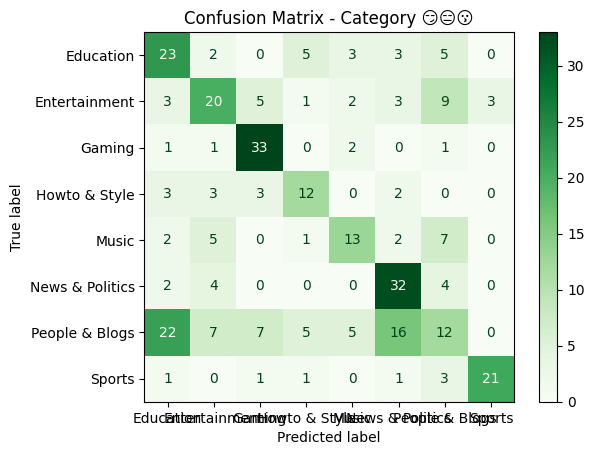

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(model, x_test_vector, y_test, cmap="Greens")
plt.title("Confusion Matrix - Category 😏😑😗")
plt.show()